In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-object-detection-api

In [40]:
#imports
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import seaborn as sns

import os
import tensorflow as tf
from tensorflow import keras
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import  Adam
from sklearn.metrics import accuracy_score
from PIL import Image
from skimage import transform


In [27]:
%matplotlib inline

Read the data

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/private projects/fruit_veg_detection/archive.zip'

VGG16 predictions

In [35]:
#For multiple images

def load_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def get_multi_predictions(model, pic_list, img_num):#img_num number of images in the list
    f, ax = plt.subplots(1, img_num)
    f.set_size_inches(12, 8)
    for i in range(img_num):
        ax[i].imshow(Image.open(pic_list[i]).resize((224, 224), Image.ANTIALIAS))
    f.show()
    
    f, axes = plt.subplots(1, img_num)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(pic_list):
        img = load_image(img_path)
        preds  = decode_predictions(model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()
        f.show()


1/1 [==============================] - 1s 620ms/step


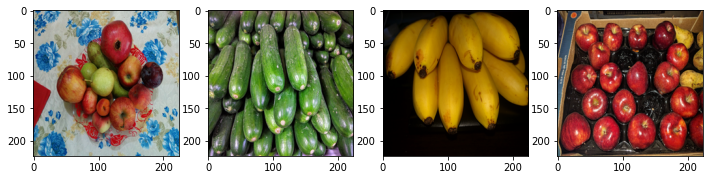

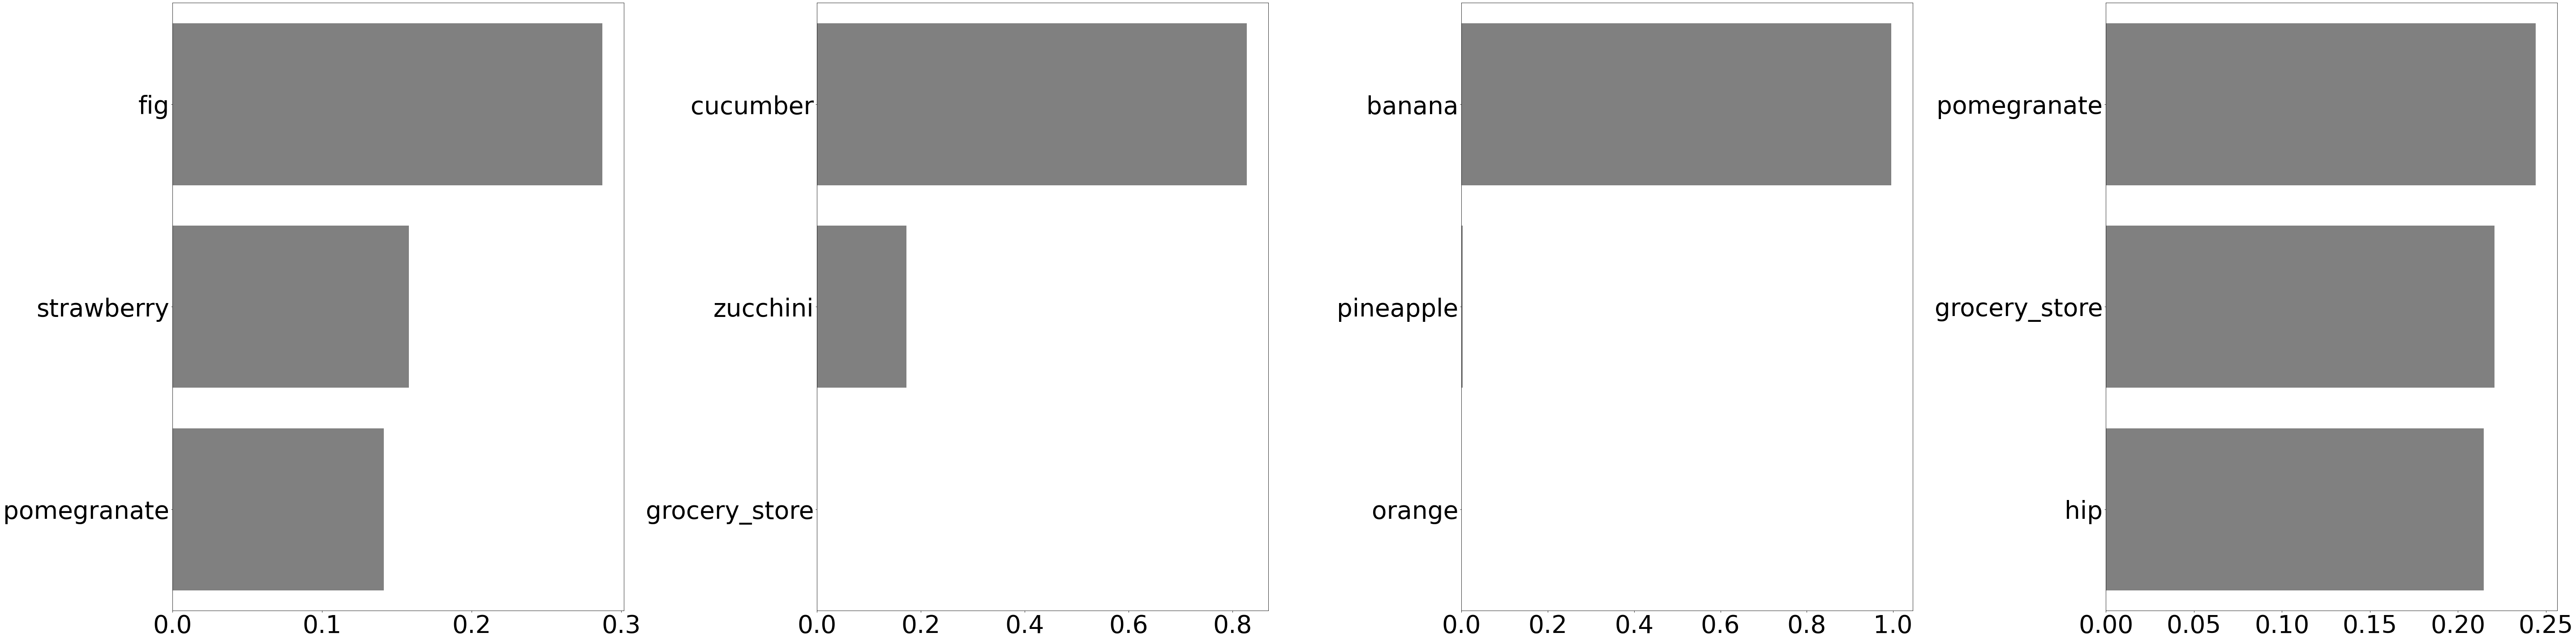

In [36]:
img1 = '/content/drive/MyDrive/Colab Notebooks/private projects/fruit_veg_detection/apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg'
img2 = '/content/drive/MyDrive/Colab Notebooks/private projects/fruit_veg_detection/test individual image/Australia_Cucumbers_for_sale_at_store.jpg'
img3 = '/content/fruits-360_dataset/fruits-360/test-multiple_fruits/Bananas(lady_finger)3.jpg'
img4 = '/content/fruits-360_dataset/fruits-360/test-multiple_fruits/apple_pear.jpg'
imgs = [img1, img2, img3, img4]

vgg16_model = VGG16(weights="imagenet")
get_multi_predictions(vgg16_model, imgs, 4)

In [23]:
#for one image
def get_one_prediction(model, img_path):
    f, ax = plt.subplots()
    f.set_size_inches(12, 8)
    ax.imshow(Image.open(img_path).resize((224, 224), Image.ANTIALIAS))
    f.show()
    
    f2, axes = plt.subplots()
    f2.set_size_inches(12, 8)
    img = load_image(img_path)
    preds  = decode_predictions(model.predict(img), top=3)[0]
    b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes)
    b.tick_params(labelsize=55)
    f2.show()

    return f, f2

1/1 [==============================] - 1s 782ms/step


(<Figure size 864x576 with 1 Axes>, <Figure size 864x576 with 1 Axes>)

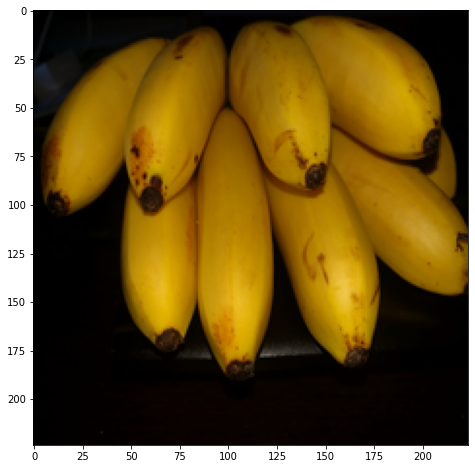

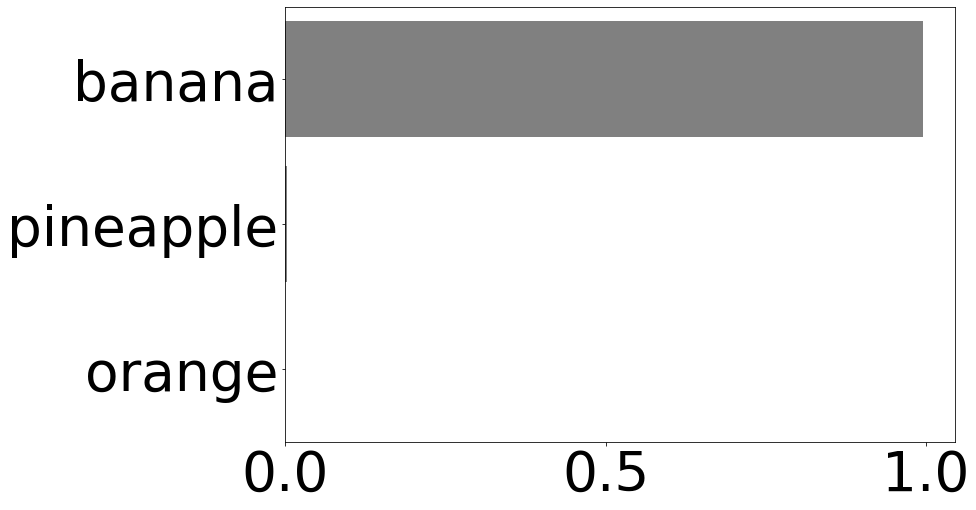

In [28]:
vgg16_model = VGG16(weights="imagenet")
get_one_prediction(vgg16_model, img3)

1/1 [==============================] - 2s 2s/step


(<Figure size 864x576 with 1 Axes>, <Figure size 864x576 with 1 Axes>)

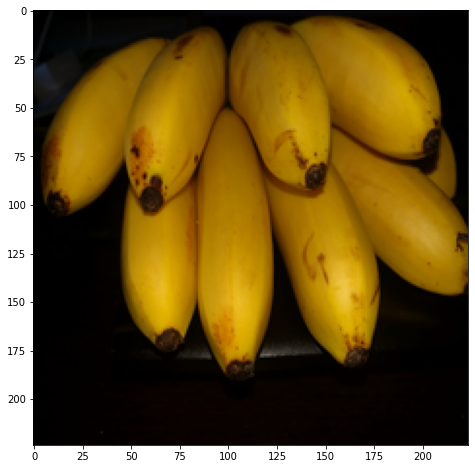

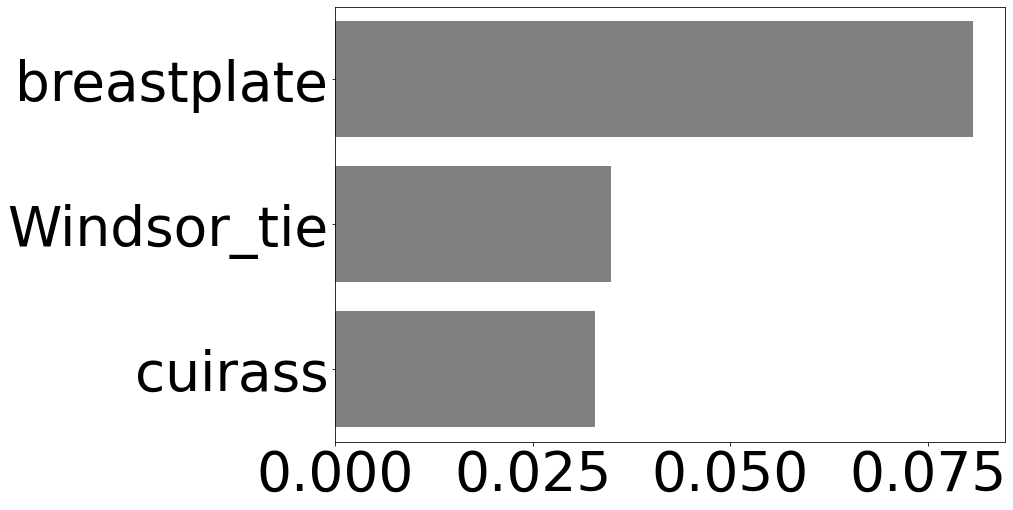

In [38]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50

efficientnet_model = EfficientNetB0(weights="imagenet") #not predicting well
resnet_model = ResNet50(weights="imagenet")
get_one_prediction(efficientnet_model, img3)

1/1 [==============================] - 0s 112ms/step


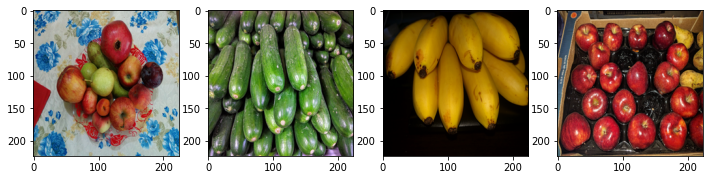

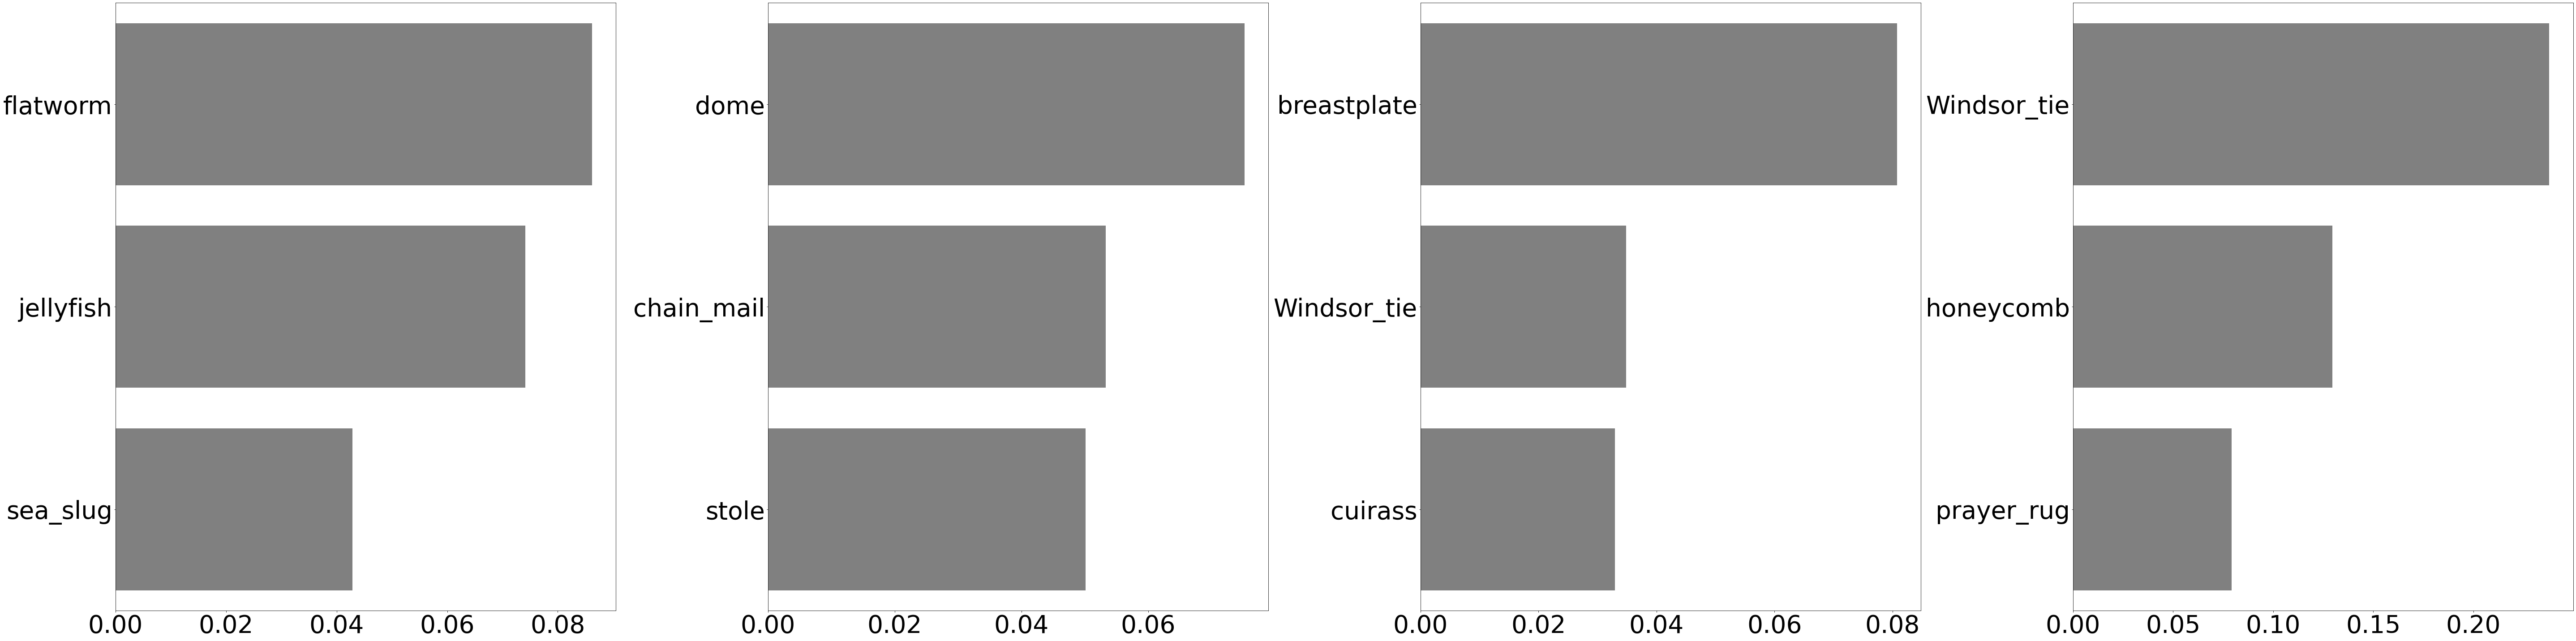

In [37]:
get_multi_predictions(efficientnet_model, imgs, 4)

1/1 [==============================] - 0s 239ms/step


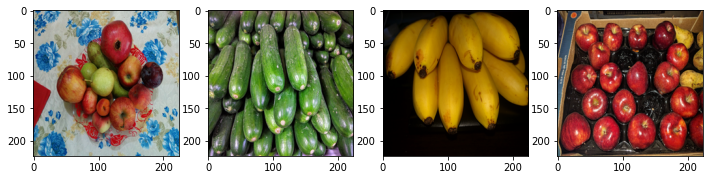

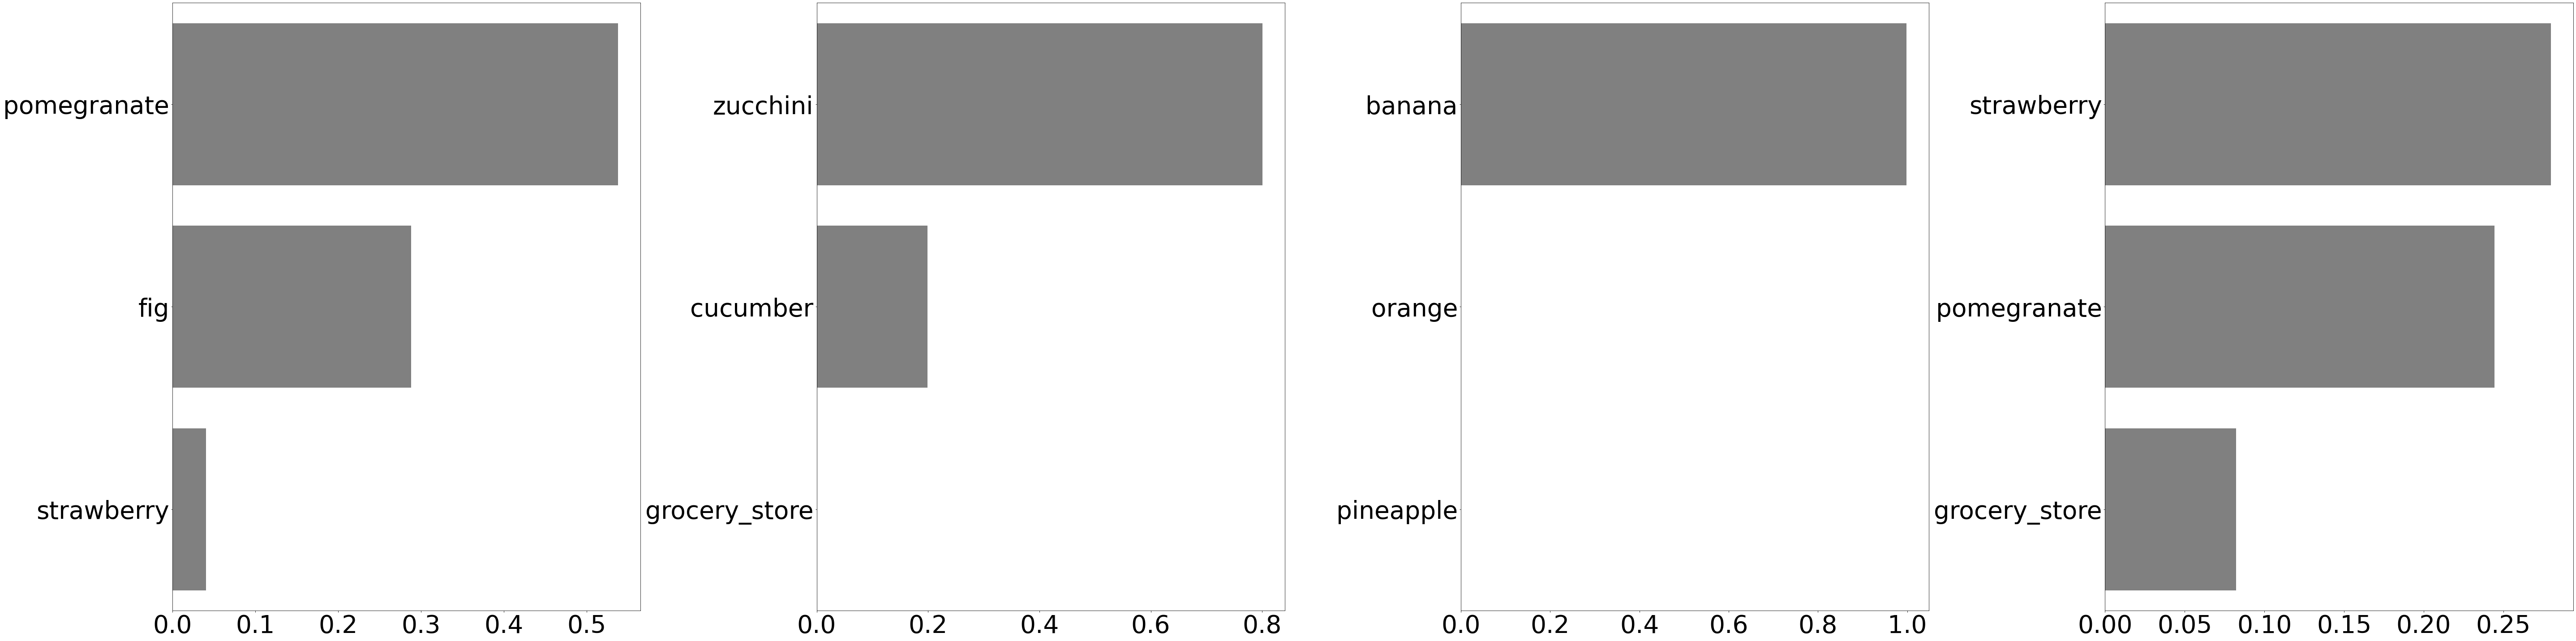

In [39]:
get_multi_predictions(resnet_model, imgs, 4)

object detection API

tutorial https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/